In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

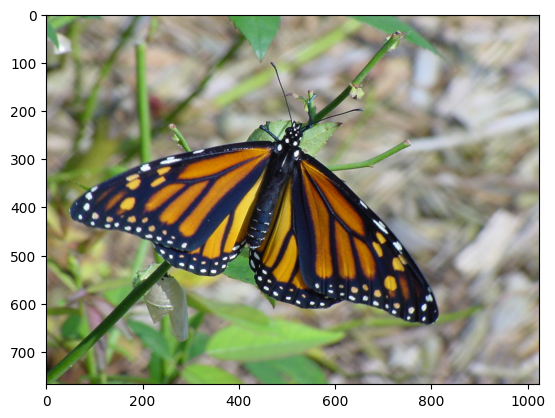

In [3]:
imBRG = cv2.imread("./leedsbutterfly/images/0010001.png")
imRGB =cv2.cvtColor(imBRG, cv2.COLOR_BGR2RGB)
plt.imshow(imRGB)
plt.show()


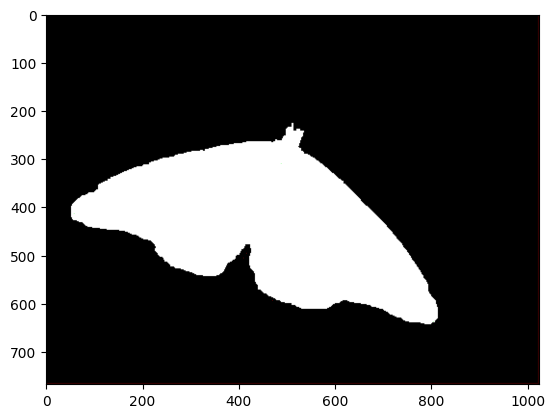

[[255   0   0]
 [  0   0   0]
 [255   0   0]
 ...
 [  0   0   0]
 [255   0   0]
 [  0   0   0]]
1024


In [12]:
seg = cv2.imread(".//leedsbutterfly/segmentations/0010001_seg0.png")
seg =cv2.cvtColor(seg, cv2.COLOR_BGR2RGB)
plt.imshow(seg)
plt.show()

print(seg[0])
print(len(seg[0]))

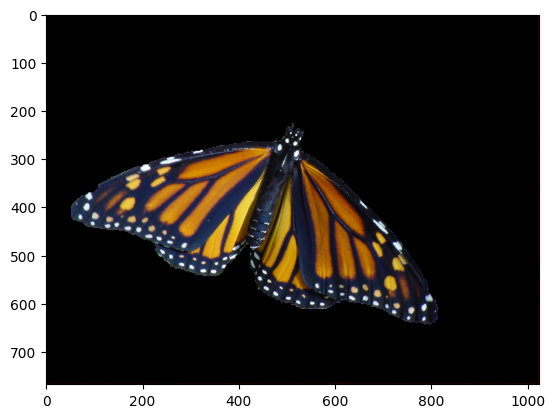

[[[0.54509804 0.         0.        ]
  [0.         0.         0.        ]
  [0.54117647 0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.55686275 0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.50196078 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.56078431 0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.30588235 0.         0.        ]
  [0.         0.         0.        ]


In [8]:
# Để trích xuất chỉ các pixel liên quan đến obj trong ảnh, ta có thể lấy  ảnh.*seg:


import numpy as np
Obj = np.multiply(imRGB/255 , seg/255) # .* matlab
plt.imshow(Obj)
plt.show()


print(Obj)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


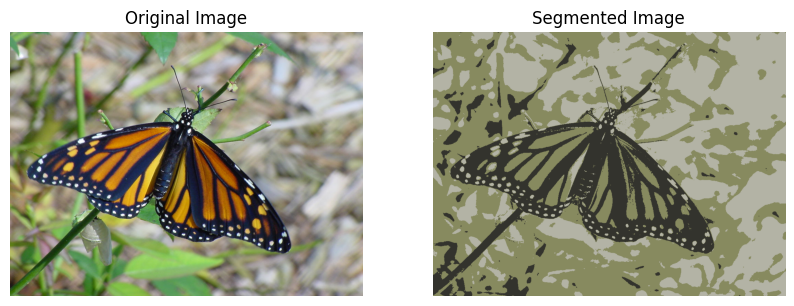

In [15]:
pixel_values = imRGB.reshape((-1, 3))
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Chọn số lượng cụm mong muốn
k = 3

# Áp dụng K-means
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixel_values)

# Lấy các giá trị trung bình của cụm
centers = np.array(kmeans.cluster_centers_, dtype=np.uint8)

# Lấy nhãn của các cụm cho từng pixel
labels = np.array(kmeans.labels_, dtype=np.uint8)

# Chuyển đổi lại hình ảnh gốc
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(imRGB.shape)

# Hiển thị hình ảnh gốc và hình ảnh đã phân cụm
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imRGB)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.show()

In [13]:
### Phần này thực hiện phân cụm mầu sắc.
### Ở đây mỗi pixel (R, G, B) tương ứng với một mầu sắc.Để phân cụm mầu sắc, ta tập hợp mầu sắc của tất cả các ảnh lại.
### Nếu dùng tất cả các ảnh để tập hợp thành một vector, số lượng mầu sắc sẽ rất lớn.
### Do vậy ta chỉ cần dùng một tập nhỏ các pixel mầu sắc, lấy ngẫu nhiên từ tập ảnh dữ liệu.

### Chon ngau nhien 50 imgs từ tất cả các classs,  de tinh toan colors_centers:

image_folder = "./leedsbutterfly/images"
import os
Image_names = os.listdir("./leedsbutterfly/images")

# Lấy ngẫu nhiên 50 tên hình ảnh
random_image_names = np.random.choice(Image_names, 5, replace=False)

all_pixels = []

# Đọc từng hình ảnh và thêm các pixel vào danh sách
for img_name in Image_names:
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    all_pixels.extend(img.reshape((-1, 3)))

# Chuyển danh sách thành mảng NumPy
all_pixels = np.array(all_pixels)

# Tính toán màu trung bình
average_color = np.mean(all_pixels, axis=0, dtype=np.uint8)

# Số lượng cụm
k = 5

# Áp dụng K-means cho màu trung bình
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)

# Lấy các giá trị trung bình của các cụm
centers = np.array(kmeans.cluster_centers_, dtype=np.uint8)

# Hiển thị màu trung bình và các màu của các trung tâm cụm
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow([average_color.reshape((1, -1, 3))])
plt.title('Average Color')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(centers.reshape((1, -1, 3)))
plt.title('Cluster Centers')
plt.axis('off')

plt.show()
